In [1060]:
import numpy as np
import pandas as pd

In [1061]:
df = pd.read_csv('../data/final_data.csv')

In [1062]:
df

,user,date,user_week,pos,rank
0,0.0,2013-12-30 11:00:00,u00_w01,"(65, 35)",48
1,0.0,2013-12-30 11:30:00,u00_w01,"(67, 34)",48
2,0.0,2013-12-30 13:30:00,u00_w01,"(143, 144)",1
3,0.0,2014-01-04 07:30:00,u00_w01,"(143, 144)",1
4,0.0,2014-01-05 20:00:00,u00_w01,"(143, 144)",1
...,...,...,...,...,...
601593,99.0,2014-07-26 23:00:00,u99_w30,"(87, 157)",44
601594,99.0,2013-12-26 14:00:00,u99_w52,"(174, 48)",44
601595,99.0,2013-12-27 14:00:00,u99_w52,"(122, 135)",44
601596,99.0,2013-12-27 15:00:00,u99_w52,"(123, 135)",44


In [8]:
# group the data frame by user week and day and count the number of rows
df_grouped = df.groupby(["user_week"]).size()
# sh

<Axes: >

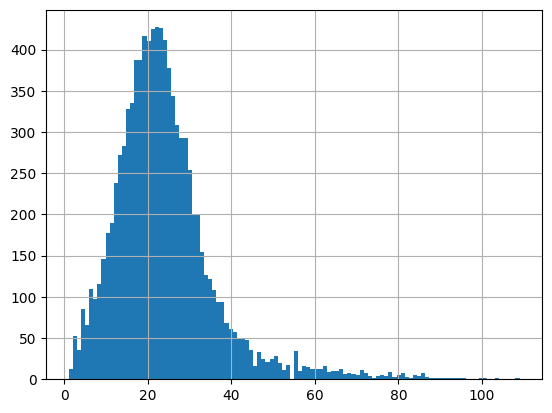

In [27]:
# plot the distribution of the number of rows per user week
df_grouped.hist(bins=110)

In [31]:
# find the minimun number of rows per user week and the corresponding user week
df_grouped.idxmin(),


('u115_w02',)

In [34]:
df[df['user_week'] == "u115_w02"]

,user_week,datetime,pos
7635,u115_w02,2014-01-06 00:00:00,"[92, 144]"


In [37]:
# add a column with a date to the df based on the existing column date time
df['date'] = pd.to_datetime(df['datetime']).dt.date

In [40]:
#group by user_week and count the number of unique dates
days_per_user_week = df.groupby(["user_week"])['date'].nunique()

<Axes: >

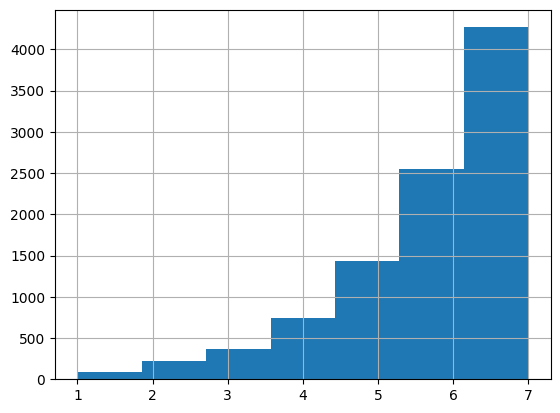

In [49]:
# plot the distribution of the number of unique dates per user week
days_per_user_week.hist(bins=7)

Entropy

In [17]:
import pandas as pd
import math
from collections import Counter

def calculate_random_entropy(df):
    """
    Calculate Random Entropy for each user in the DataFrame.
    :param df: Pandas DataFrame with columns 'user' and 'pos'.
    :return: Dictionary of Random Entropy for each user.
    """
    return df.groupby('user')['pos'].nunique().apply(math.log).to_dict()

def calculate_temporal_uncorrelated_entropy(df):
    """
    Calculate Temporal-Uncorrelated Entropy for each user in the DataFrame.
    :param df: Pandas DataFrame with columns 'user' and 'pos'.
    :return: Dictionary of Temporal-Uncorrelated Entropy for each user.
    """
    entropy_dict = {}
    for user, group in df.groupby('user'):
        location_counter = Counter(group['pos'])
        total_visits = sum(location_counter.values())
        entropy = 0
        for count in location_counter.values():
            probability = count / total_visits
            entropy -= probability * math.log2(probability)
        entropy_dict[user] = entropy
    return entropy_dict

def calculate_actual_entropy(df):
    """
    Calculate a simplified version of Actual Entropy for each user in the DataFrame.
    :param df: Pandas DataFrame with columns 'user' and 'pos'.
    :return: Dictionary of Actual Entropy for each user.
    """
    entropy_dict = {}
    for user, group in df.groupby('user'):
        locations = group['pos'].tolist()
        location_sequence_counter = Counter([tuple(locations[i:i+2]) for i in range(len(locations)-1)])
        total_sequences = sum(location_sequence_counter.values())
        entropy = 0
        for count in location_sequence_counter.values():
            probability = count / total_sequences
            entropy -= probability * math.log2(probability)
        entropy_dict[user] = entropy
    return entropy_dict



In [27]:
from itertools import combinations

def calculate_actual_entropy_advanced(df):
    """
    Calculate the Actual Entropy as defined in the paper for each user in the DataFrame.
    :param df: Pandas DataFrame with columns 'user' and 'pos' representing the trajectory.
    :return: Dictionary of Actual Entropy for each user.
    """
    entropy_dict = {}

    for user, group in df.groupby('user'):
        trajectory = group['pos'].tolist()
        subsequence_counter = Counter()

        # Counting all possible subsequences
        for length in range(1, len(trajectory) + 1):
            for subsequence in combinations(trajectory, length):
                subsequence_counter[subsequence] += 1

        total_subsequences = sum(subsequence_counter.values())
        entropy = 0

        for subsequence, count in subsequence_counter.items():
            probability = count / total_subsequences
            entropy -= probability * math.log2(probability)

        entropy_dict[user] = entropy

    return entropy_dict



/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/s212588/.conda/envs/locpredict/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

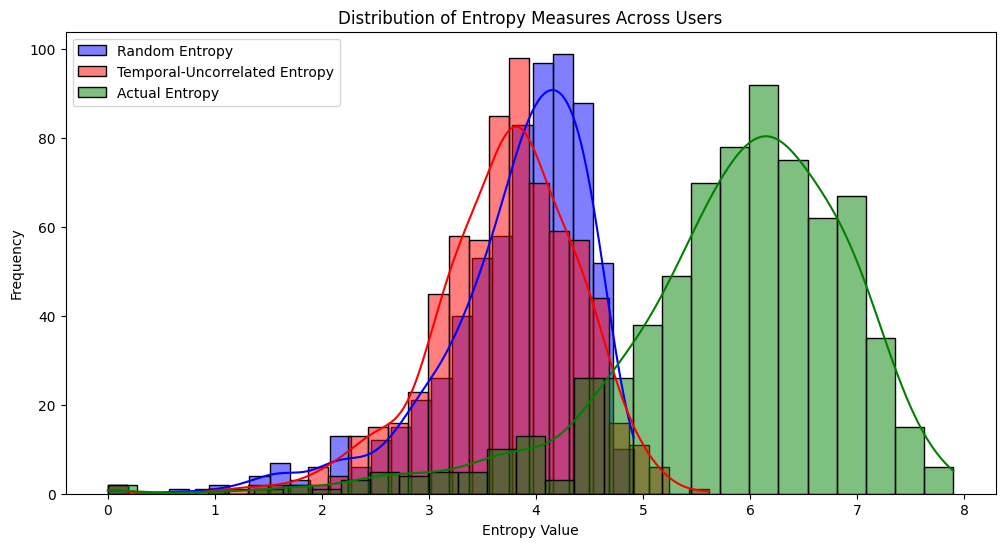

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate entropies
random_entropy = calculate_random_entropy(df)
temporal_uncorrelated_entropy = calculate_temporal_uncorrelated_entropy(df)
actual_entropy = calculate_actual_entropy(df)

# Convert to DataFrame for plotting
entropy_df = pd.DataFrame({
    'User': list(random_entropy.keys()),
    'Random Entropy': list(random_entropy.values()),
    'Temporal-Uncorrelated Entropy': list(temporal_uncorrelated_entropy.values()),
    'Actual Entropy': list(actual_entropy.values()),
})

# Plotting
plt.figure(figsize=(12, 6))

# Random Entropy
sns.histplot(entropy_df['Random Entropy'], color='blue', label='Random Entropy', kde=True)

# Temporal-Uncorrelated Entropy
sns.histplot(entropy_df['Temporal-Uncorrelated Entropy'], color='red', label='Temporal-Uncorrelated Entropy', kde=True)

# Actual Entropy
sns.histplot(entropy_df['Actual Entropy'], color='green', label='Actual Entropy', kde=True)


plt.title('Distribution of Entropy Measures Across Users')
plt.xlabel('Entropy Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()
